<a href="https://www.kaggle.com/code/nikhil1e9/machine-anomaly-detection?scriptVersionId=139262138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s3e17/sample_submission.csv")

In [3]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
train.drop('id', axis=1, inplace=True)

In [5]:
train.shape

(136429, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 13.5+ MB


## EDA

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>,
        <Axes: title={'center': 'Rotational speed [rpm]'}>],
       [<Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Machine failure'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>, <Axes: title={'center': 'RNF'}>,
        <Axes: >]], dtype=object)

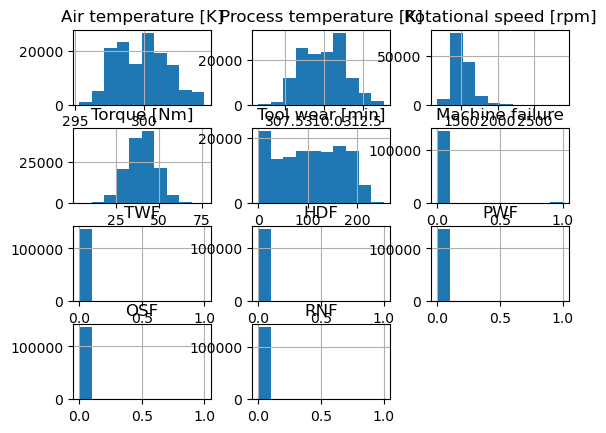

In [7]:
train.hist()

In [8]:
train.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train.describe(include='object')

,Product ID,Type
count,136429,136429
unique,9976,3
top,L53257,L
freq,139,95354


In [10]:
for col in train.columns:
    if train[col].nunique() <= 3:
        print(train[col].value_counts().sort_values(ascending=False))
    else:
        print(col, train[col].nunique())
    print()

Product ID 9976

L    95354
M    32152
H     8923
Name: Type, dtype: int64

Air temperature [K] 95

Process temperature [K] 81

Rotational speed [rpm] 952

Torque [Nm] 611

Tool wear [min] 246

0    134281
1      2148
Name: Machine failure, dtype: int64

0    136217
1       212
Name: TWF, dtype: int64

0    135725
1       704
Name: HDF, dtype: int64

0    136102
1       327
Name: PWF, dtype: int64

0    135889
1       540
Name: OSF, dtype: int64

0    136121
1       308
Name: RNF, dtype: int64



<Axes: xlabel='Type', ylabel='count'>

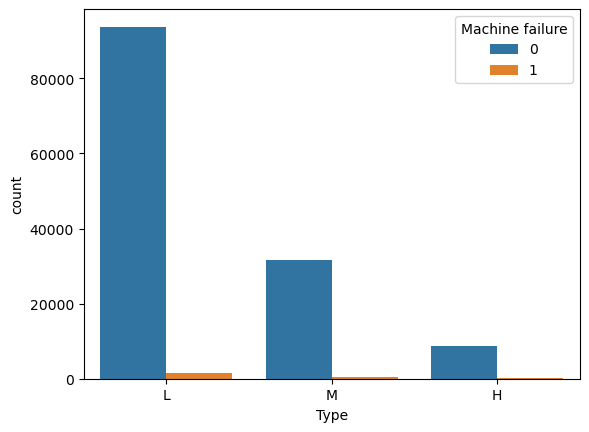

In [11]:
sns.countplot(x='Type', hue='Machine failure', data=train)

<Axes: xlabel='Type'>

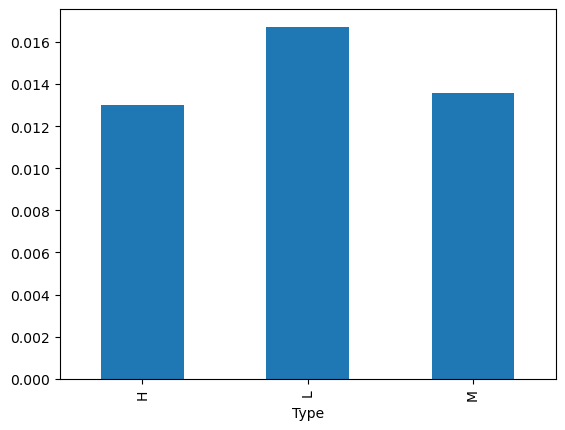

In [12]:
train.groupby('Type')['Machine failure'].mean().plot.bar()

In [13]:
for col in train.columns[-5:]:
    print(col, train[train[col]==1]['Machine failure'].mean())

TWF 1.0
HDF 0.9914772727272727
PWF 0.9908256880733946
OSF 0.9925925925925926
RNF 0.01948051948051948


Always fails if TWF is 1

In [14]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier, XGBRegressor

In [15]:
# Separate target from predictors
y = train['Machine failure']
X = train.drop(['Machine failure', 'Product ID'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Select categorical columns 
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()

In [16]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [17]:
model = XGBRegressor(objective='reg:logistic', n_estimators=300, learning_rate=0.05, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

In [18]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [19]:
print(roc_auc_score(y_valid, preds))
# plot_roc_curve(y_valid, preds)

0.9705964527071446


## Submission

In [20]:
X_test = test.drop(['id', 'Product ID'], axis=1)

In [21]:
final_preds = my_pipeline.predict(X_test)

In [22]:
submission['Machine failure'] = final_preds

In [23]:
submission.to_csv("my_submission.csv", index=False)